In [4]:
import pandas as pd
import numpy as np
import timeit
from random import randrange
import matplotlib.pyplot as plt

In [5]:
plt.rcParams['figure.dpi'] = 190

# Tiempos Teoricos

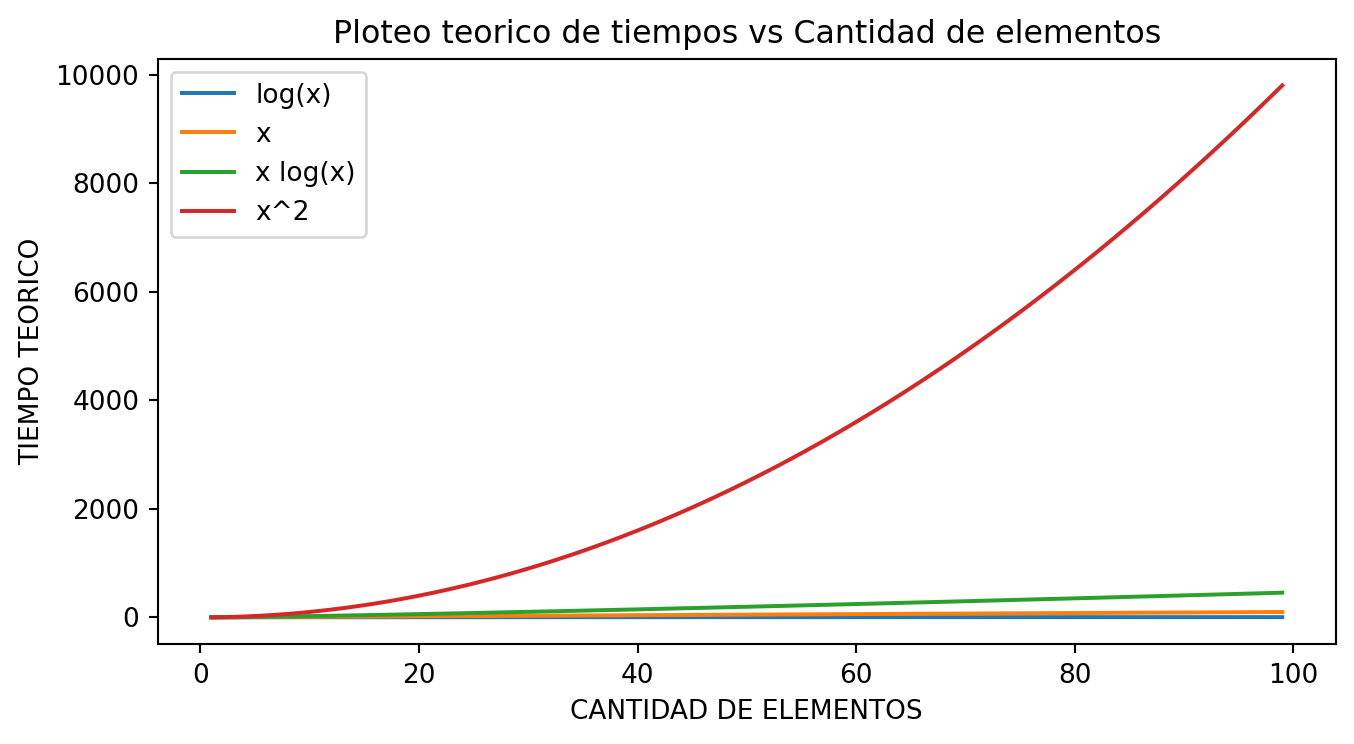

In [6]:
def plotear_teoricos(cantidad):
    df = pd.DataFrame()
    df['i'] = [x for x in range(1,cantidad)]
    
    df['log(x)'] = np.log(df.i)
    df['x'] = df.i
    df['x log(x)'] = df.i * np.log(df.i)
    df['x^2'] = np.power(df.i, 2)

    ax = df.plot(x='i', title='Ploteo teorico de tiempos vs Cantidad de elementos',  figsize=(8, 4))
    ax.set_xlabel("CANTIDAD DE ELEMENTOS")
    ax.set_ylabel("TIEMPO TEORICO")
    

plotear_teoricos(100)

In [7]:
# Funciones auxiliares, no es necesario entenderlas

def crear_lista_desordenada(cantidad):
    ar = np.random.rand(1, cantidad) * 100
    ar = ar.tolist()[0]
    ar = [int(x) for x in ar] 
    return ar


def crear_lista_ordenada(cantidad):
    ar = np.random.rand(1, cantidad) * 100
    ar = np.sort(ar)
    ar = ar.tolist()[0]
    ar = [int(x) for x in ar]
    return np.sort(ar)


# Orden O(n)
def esta_ordenado(lista):
    anterior = lista[0]
    for x in lista:
        if anterior > x:
            return False
        anterior = x
    return True

# Analisis de tiempos Busqueda Lineal VS Busqueda Binaria

In [8]:
# Algoritmos a analizar

# Orden O(n)
# Nota: No importa si los elementos están ordenados
def busqueda_lineal(lista, elemento_buscado):
    for i in range(len(lista)):
        if lista[i] == elemento_buscado:
            return i
    return -1


# Orden O(log(n))
# Precondicion: Los elementos estén ordenados
def busqueda_binaria(lista, elemento_buscado, inicio, fin):
    if inicio >= fin:
        return -1
    
    medio = inicio + ((fin - inicio) // 2)
    
    if lista[medio] == elemento_buscado:
        return medio
    
    if lista[medio] < elemento_buscado:
        return busqueda_binaria(lista, elemento_buscado, inicio=medio+1, fin=fin)
    
    return busqueda_binaria(lista, elemento_buscado, inicio=inicio, fin=medio-1)

Text(0, 0.5, 'SEGUNDOS')

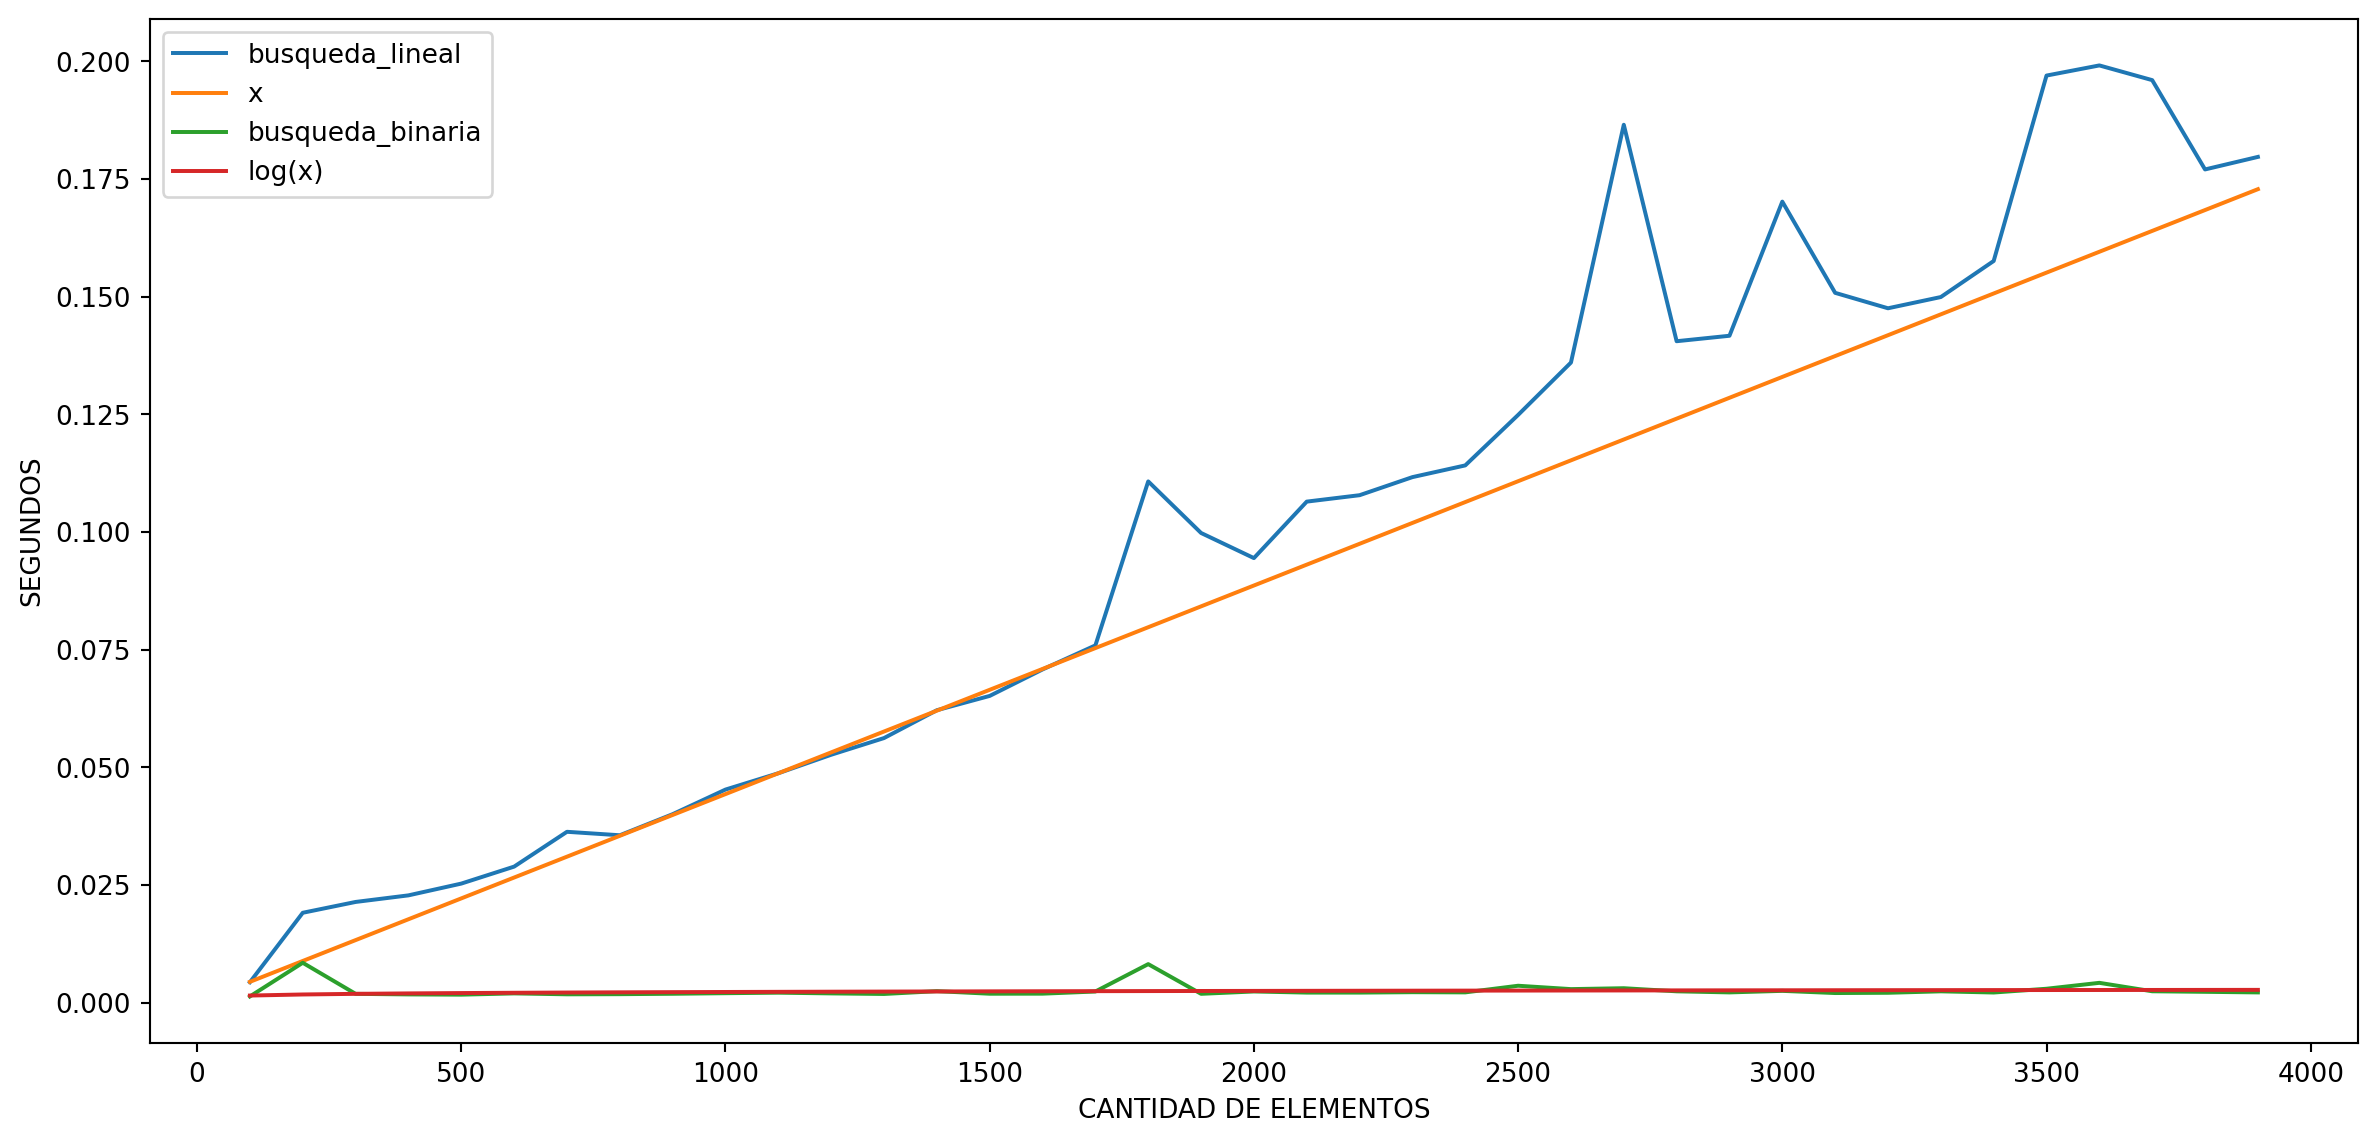

In [9]:
# Codigo para medir tiempos y graficar
# No es importante que los entiendan

tiempos_busqueda_lineal = []
tiempos_busqueda_binaria = []
cantidades_a_probar = range(100, 4000, 100)

listas_a_buscar = {cant: crear_lista_ordenada(cant) for cant in cantidades_a_probar}
for cant in cantidades_a_probar: 
    tiempos_busqueda_lineal.append(
        timeit.timeit('busqueda_lineal(listas_a_buscar['+str(cant)+'], randrange('+str(cant)+'))', globals=globals(), number=200)
    )
    tiempos_busqueda_binaria.append(
        timeit.timeit('busqueda_binaria(listas_a_buscar['+str(cant)+'], randrange('+str(cant)+'), 0, '+str(cant)+')', globals=globals(), number=200)
    )

df = pd.DataFrame()
df['i'] = cantidades_a_probar

df['busqueda_lineal'] = tiempos_busqueda_lineal
coeficiente_x = df.i[10] / tiempos_busqueda_lineal[10]
df['x'] = df.i / coeficiente_x

df['busqueda_binaria'] = tiempos_busqueda_binaria
coeficiente_logx = np.log(df.i[2]) / tiempos_busqueda_binaria[2]
df['log(x)'] = np.log(df.i) / coeficiente_logx

ax = df.plot(x='i', figsize=(15, 7))
ax.set_xlabel("CANTIDAD DE ELEMENTOS")
ax.set_ylabel("SEGUNDOS")

# Analisis de tiempos de algoritmos de ordenamiento:  <br> Seleccion  VS  Mergesort  VS  Quicksort

In [10]:
# Algoritmo de Seleccion

# Orden: O(n)
def maximo(lista, largo):
    maximo = 0
    for i in range(largo):
        if lista[maximo] <= lista[i]:
            maximo = i
    return maximo


# Orden: O(n^2)
def seleccion(lista):
    for i in range(len(lista), 0, -1):
        pos_max = maximo(lista, i)
        lista[i-1] , lista[pos_max] = lista[pos_max], lista[i-1] # swap
    return lista

In [11]:
# Algoritmo de Mergesort

# Orden O(n)
def merge(lista1, lista2):
    merged_list = []
    usados_lista1 = 0
    usados_lista2 = 0
    
    while usados_lista1 < len(lista1) and usados_lista2 < len(lista2):
        if lista1[usados_lista1] < lista2[usados_lista2]:
            merged_list.append(lista1[usados_lista1])
            usados_lista1 += 1
        else:
            merged_list.append(lista2[usados_lista2])
            usados_lista2 += 1
    
    merged_list.extend(lista1[usados_lista1:])
    merged_list.extend(lista2[usados_lista2:])
    return merged_list


# Orden O(n log(n))
def merge_sort(lista):
    if len(lista) <= 1:
        return lista
    
    medio = len(lista)//2
    
    izq = merge_sort(lista[:medio])
    der = merge_sort(lista[medio:])
    
    return merge(izq, der)


In [12]:
# Algoritmo de Quicksort

# Nota: Elije al pivot como el ultimo
# Nota2: Hay muchas formas de elejir el pivot y de realizar la particion, esta es una de ellas.
def partir_usando_pivot(lista, inicio, fin):
    pos = inicio
    for i in range(inicio, fin):
        if lista[i] < lista[fin]:
            lista[i], lista[pos] = lista[pos], lista[i]  #Swap i con pos
            pos += 1
            
    # swap pivot(fin) con pos, asi queda bien pivot
    lista[pos], lista[fin] = lista[fin], lista[pos]     
    
    return pos


# Orden: O(n log(n))
def quick_sort(lista, inicio, fin):
    if fin < inicio: return lista
    
    pos_pivot = partir_usando_pivot(lista, inicio, fin)
    quick_sort(lista, inicio, pos_pivot - 1)
    quick_sort(lista, pos_pivot + 1, fin)
    
    return lista


In [13]:
# Codigo para medir tiempos y graficar
# No es importante que los entiendan
CANT_EXPERIMENTOS = 50

tiempos_mergesort = []
tiempos_seleccion = []
tiempos_quicksort = []

cantidades_a_probar = range(500, 3001, 500)

for cant in cantidades_a_probar: 
    tiempos_mergesort.append(
        timeit.timeit(f"merge_sort(crear_lista_desordenada({cant}))", globals=globals(), number=CANT_EXPERIMENTOS)
    )
    tiempos_seleccion.append(
        timeit.timeit(f"seleccion(crear_lista_desordenada({cant}))", globals=globals(), number=CANT_EXPERIMENTOS)
    )
    tiempos_quicksort.append(
        timeit.timeit(f"quick_sort(crear_lista_desordenada({cant}), 0, {cant-1})", globals=globals(), number=CANT_EXPERIMENTOS)
    )

Text(0, 0.5, 'SEGUNDOS')

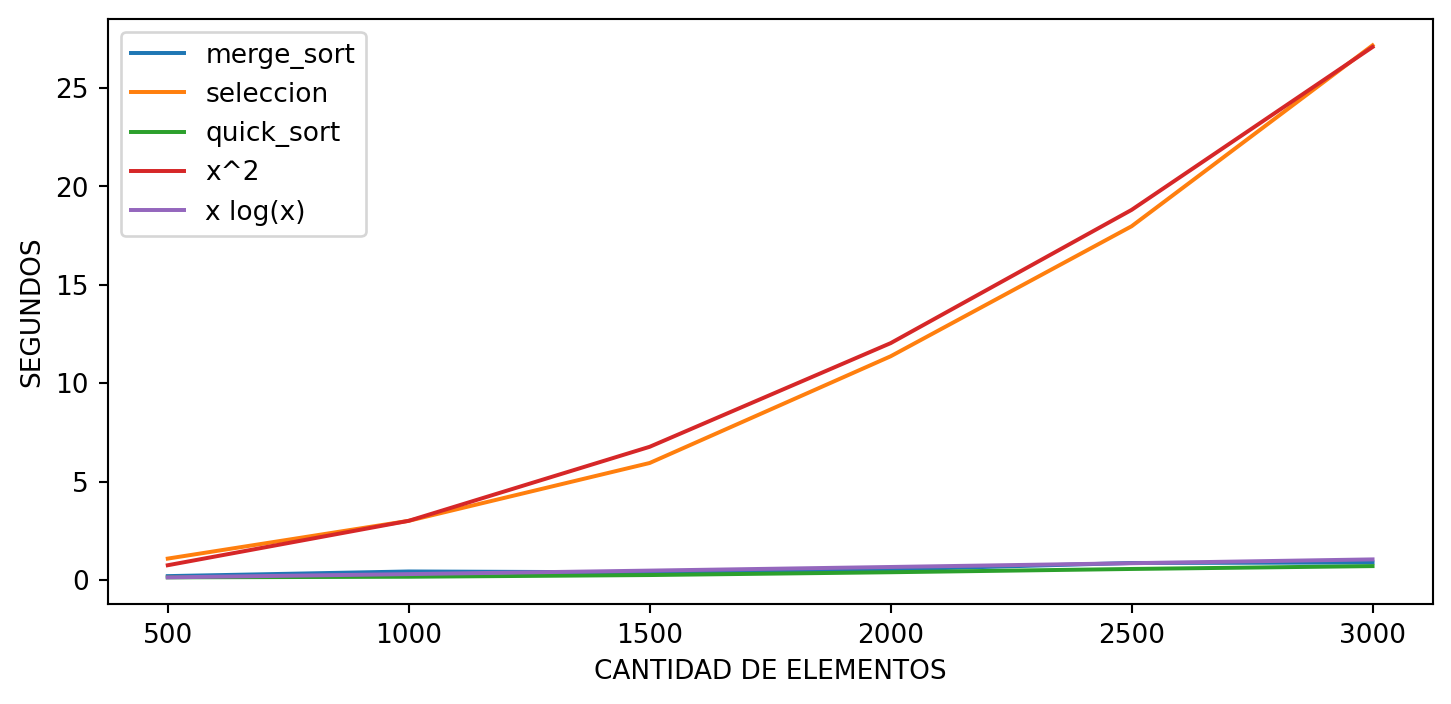

In [14]:
df = pd.DataFrame()
df['i'] = cantidades_a_probar
df['merge_sort'] = tiempos_mergesort
df['seleccion'] = tiempos_seleccion
df['quick_sort'] = tiempos_quicksort

coeficiente_x_cuadrado = np.power(df.i[1], 2) / tiempos_seleccion[1]
coeficiente_x_logx = (df.i[1] * np.log(df.i[1])) / ((tiempos_mergesort[1]+tiempos_quicksort[1])/2)

df['x^2'] = np.power(df.i, 2) / coeficiente_x_cuadrado
df['x log(x)'] = (df.i * np.log(df.i)) / coeficiente_x_logx

ax = df.plot(x='i', figsize=(9, 4))
ax.set_xlabel("CANTIDAD DE ELEMENTOS")
ax.set_ylabel("SEGUNDOS")